In [3]:
%load_ext autoreload
%autoreload 2

import json
from os import path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tbd_eeg.data_analysis.eegutils import EEGexp
from glob import glob

datastore = '/home/jupyter-avinash/datastore/allen_mouse_eeg'
#pip install -e .

from sklearn import preprocessing
from ONN_Test import ONN
import threading#, time

np.seterr(all='raise')

import scipy
from scipy import signal

#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 5648576 

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm
import matplotlib.font_manager as fm

# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]

# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# Generate 2 colors from the 'tab10' colormap
colors = cm.get_cmap('tab10', 10)

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 3))

# Add axes object to our figure that takes up entire figure
#ax = fig.add_axes([0, 0, 1, 1])

<Figure size 300x300 with 0 Axes>

In [5]:
#%matplotlib widget
arr = np.array([0.00022573837340200478, 4429.906997775501])
np.power(1.0774737962681116-0.049937786342965015j, arr)

array([ 1.00001709e+000-1.04550162e-005j,
       -2.39612454e+145+3.44449700e+145j])

In [6]:
import os
cwd = os.getcwd()
print(cwd)

/home/jupyter-avinash/ranjan_env_15_Feb_2023/mouse_brain_project/hopf_oscillator/Workspace


In [5]:
so_many_mouse = glob(datastore+"/mouse*")

for mouse in so_many_mouse:
    sessions = [path.basename(f) for f in glob(path.join(mouse, '*'))]
    print(sessions)
    
    for expt in sessions:
        if expt != 'histology':
            rec_folder = path.join(mouse, expt, 'experiment1/recording1')
            print(rec_folder)
            exp = EEGexp(rec_folder, preprocess=False, make_stim_csv=False)
            print(exp.ephys_params['EEG'])
        

['estim_vis_2021-01-22_11-07-12', 'histology', 'signal_test_2021-01-14_13-42-04', 'stim_test_2021-01-22_10-38-03']
/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse551400/estim_vis_2021-01-22_11-07-12/experiment1/recording1
Experiment type: sensory stimulation
SomnoSuite log file not found.
Body camera file not found.
Pupil camera file not found.
{'sample_rate': 2500, 'num_chs': 40, 'bit_volts': 0.19499999284744263, 'units': 'uV', 'continuous': '/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse551400/estim_vis_2021-01-22_11-07-12/experiment1/recording1/continuous/Rhythm_FPGA-156.0/continuous.dat', 'timestamps': '/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse551400/estim_vis_2021-01-22_11-07-12/experiment1/recording1/continuous/Rhythm_FPGA-156.0/timestamps_master_clock.npy'}
/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse551400/signal_test_2021-01-14_13-42-04/experiment1/recording1
Experiment type: sensory stimulation
SomnoSuite log file not found.
Body camera file 

KeyboardInterrupt: Interrupted by user

In [7]:
mouse = 'mouse599975'

print('Available sessions:')
print([path.basename(f) for f in glob(path.join(datastore, mouse, '*'))])

Available sessions:
['estim_vis_2022-03-31_12-03-06', 'histology', 'signal_test_2022-02-08_13-19-49', 'urethane_vis_2022-04-01_10-58-41']


In [8]:
expt = 'estim_vis_2022-03-31_12-03-06'

rec_folder = path.join(datastore, mouse, expt, 'experiment1/recording1')
exp = EEGexp(rec_folder, preprocess=False, make_stim_csv=False)

print(exp.ephys_params['EEG'])

Experiment type: sensory stimulation
SomnoSuite log file not found.
Body camera file not found.
Pupil camera file not found.
{'sample_rate': 500, 'num_chs': 40, 'bit_volts': 0.19499999284744263, 'units': 'uV', 'continuous': '/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/continuous/Rhythm_FPGA-101.0/continuous.dat', 'timestamps': '/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/continuous/Rhythm_FPGA-101.0/timestamps_master_clock.npy'}


In [9]:
print(exp.stimulus_log_file)

#Deafult sampling rate si 250 and not 2500 - rhythm_info, structure.oebin
## loading the EEG data
eegdata = exp.load_eegdata(return_type='pd', downsamplefactor=1)
eegdata.head()

/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/sensory_stim_log.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
12.487579,-21.839999,-0.195000,22.619999,-41.729998,-20.279999,15.209999,-27.689999,-20.279999,-8.580000,-23.204999,-17.744999,-20.669999,-15.209999,-34.514999,-36.659999,-47.384998,-38.999999,-28.859999,-58.499998,-26.324999,-85.409997,7.605000,-61.229998,-89.894997,11.700000,-77.024997,-88.724997,14.234999,-30.224999,-69.224997
12.489579,-7.800000,27.104999,44.264998,0.000000,9.750000,42.314998,-5.850000,29.249999,38.219999,21.254999,28.664999,26.324999,25.739999,14.429999,3.900000,0.195000,-1.755000,15.404999,-18.719999,11.505000,-33.734999,50.894998,-1.560000,-32.564999,47.189998,-5.070000,-30.809999,39.194999,13.844999,-19.109999
12.491579,-1.170000,37.439999,61.229998,26.519999,49.724998,69.224997,22.424999,48.749998,57.719998,34.514999,43.094998,34.904999,36.464999,22.229999,14.624999,2.730000,-15.599999,19.304999,-45.239998,14.039999,-27.494999,76.244997,43.874998,33.344999,81.119997,49.139998,-6.630000,60.059998,32.174999,-15.404999
12.493579,22.034999,34.709999,52.259998,38.804999,45.629998,62.789998,28.664999,52.454998,62.009998,33.929999,50.699998,44.654998,48.359998,37.244999,28.274999,11.700000,-12.285000,27.884999,-42.314998,13.649999,-23.984999,78.584997,62.204998,38.219999,82.484997,67.859998,-3.315000,59.669998,45.629998,-4.875000
12.495579,22.814999,27.104999,44.264998,46.019998,53.039998,58.499998,23.399999,54.014998,62.789998,30.809999,54.794998,44.069998,62.789998,48.944998,38.024999,24.374999,2.730000,45.629998,1.755000,52.064998,24.179999,78.779997,78.974997,49.334998,72.734997,70.979997,15.794999,50.504998,50.114998,-1.950000


In [10]:
eegdata.to_csv("mouse_599975_continuous.csv")

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


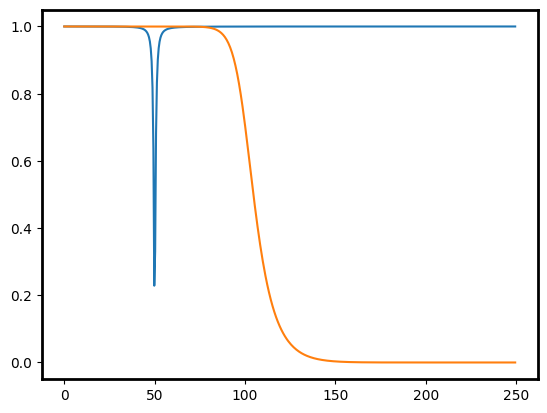

In [11]:
#Pre-process eeg data
fs = 500 #Sampling frequency
f0 = 50 #Frequency to removed
Q = 30 #Notch filter frequency
fc = 100 #Cutoff frequency for low pass filter

#Design notch filter
b_notch, a_notch = signal.iirnotch(f0, Q, fs)
#Design low pass filter
b_lpf, a_lpf = signal.butter(9, fc/(fs/2), btype='low')
#Frequency response
freq_notch, h_notch = signal.freqz(b_notch, a_notch, fs=fs)
freq_lpf, h_lpf = signal.freqz(b_lpf, a_lpf, fs=fs)

f = plt.figure()
plt.plot(freq_notch, abs(h_notch))
plt.plot(freq_lpf, abs(h_lpf))
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [12]:
#Pre-process and update panda dataframe
fsig = []
for col in eegdata:
    #Apply notch filter
    fltsig = signal.filtfilt(b_notch, a_notch, eegdata.iloc[:,col])
    #Apply low pass filter
    fltsig = signal.filtfilt(b_lpf, a_lpf, fltsig)
    fsig.append(fltsig)
    
fsig = np.array(fsig).T
processedData = notchdf = pd.DataFrame(fsig, index=eegdata.index)

In [13]:
exp.stimulus_log_file

'/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/sensory_stim_log.csv'

In [14]:
stim_data = pd.read_csv('/home/jupyter-avinash/datastore/allen_mouse_eeg/mouse599975/estim_vis_2022-03-31_12-03-06/experiment1/recording1/all_stim_log.csv')
df = stim_data.groupby(['sweep', 'stim_type'])
print(df.groups.keys())

#(0, 'biphasic')
grp_idxs = []
for key in df.groups.keys():
    grp_idxs.append(df.get_group(key))

GRP = 0

#biphasic - slectrical stimulus
#circle - visual
#diff = 4964.65149

NUM_STIM = len(stim_data)
idx = np.where(np.in1d(np.array(stim_data.onset), np.array(grp_idxs[GRP].onset)))[0]
stim_data.loc[idx[0]]
stim_data

dict_keys([(0, 'biphasic'), (0, 'circle'), (1, 'biphasic'), (1, 'circle')])


,stim_type,parameter,onset,offset,duration,sweep
0,biphasic,30,313.17998,313.18038,0.00040,0
1,biphasic,30,317.04933,317.04973,0.00040,0
2,biphasic,50,321.01047,321.01087,0.00040,0
3,biphasic,70,325.49254,325.49294,0.00040,0
4,biphasic,70,329.14937,329.14977,0.00040,0
...,...,...,...,...,...,...
955,circle,white,5260.03320,5260.28254,0.24934,1
956,circle,white,5264.48693,5264.73626,0.24933,1
957,circle,white,5268.64042,5268.90643,0.26601,1
958,circle,white,5273.11081,5273.36016,0.24935,1


In [15]:
df.count()
stim_start = 311.17998
stim_end = 5279.83147

eeg_data_1 = eegdata[eegdata.index < stim_start] #Before start of stimulus
eeg_data_ = eegdata[eegdata.index >= stim_start] 
eeg_data_2 = eeg_data_[eeg_data_.index <= stim_end] #Contains multiple stimulations
eeg_data_3 = eegdata[eegdata.index > stim_end] #After End of stimulus

#(311.67998, 314.67998]
test =  eegdata[eegdata.index > 319.51047]
test = test[test.index <= 322.51047]

len(test)

1500

In [14]:
#eeg_split = eeg_data_2.groupby(np.arange(len(eeg_data_2)) // 2588)
#eeg_split.get_group(1)

In [16]:
#3 seconds chunk
labels = stim_data['onset']
start_dur = labels - 1.5
end_dur = labels + 1.5
bins = pd.IntervalIndex.from_arrays(start_dur, end_dur)

#No need to use processed data if signal averaging is done
#segmented = pd.cut(eegdata.index, bins)
segmented = pd.cut(processedData.index, bins)
#groups = eegdata.groupby(segmented)
groups = processedData.groupby(segmented)
groups

In [17]:
unique_keys = np.array(list(groups.groups.keys())) #pd.unique(groups.keys)
#unique_keys = unique_keys[1:NUM_STIM] #Ignoring the NaN group
print(len(unique_keys))
ERP_KEYS = unique_keys[idx]

segmented_data = groups.get_group(ERP_KEYS[0])
segmented_data

#s2 = groups.get_group(unique_keys[1])
#dictionary = dict(zip(cur_df.index, segmented_data.index))
#add_df = segmented_data.rename(index=dictionary)
#add_df = add_df.add(segmented_data)

idx_to_plot = segmented_data.keys
ERP_KEYS = unique_keys[idx]
ERP = pd.DataFrame()
ref_df = segmented_data
for key in ERP_KEYS:
    #Panda dataframe
    cur_df = groups.get_group(key)
    dictionary = dict(zip(cur_df.index, ref_df.index))
    cur_df = cur_df.rename(index=dictionary)
    ERP = ERP.add(cur_df, fill_value=0)

ERP = ERP / len(ERP_KEYS)
ERP


960


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
311.681769,-8.229744,-4.445548,-4.792649,-14.653523,-18.473368,-9.696279,-14.417594,-14.972025,-12.840218,-12.664973,-14.239872,-13.220737,-12.607920,-14.937904,-12.555396,-11.808910,-11.022770,-12.045008,-10.327965,-11.204903,-10.915682,-10.024260,-10.903660,-11.196224,-8.192626,-8.227402,-8.592269,-4.754172,-4.044547,-3.856827
311.683769,-8.552329,-4.398808,-4.638124,-14.348609,-18.140972,-9.400035,-14.058205,-14.466540,-12.488502,-11.734387,-13.458693,-12.322384,-12.515912,-14.608863,-12.610861,-12.110911,-11.434731,-12.338420,-11.361538,-12.695924,-12.998499,-10.225202,-11.821929,-12.023427,-8.139989,-7.861201,-8.234800,-4.519008,-3.615741,-3.579543
311.685769,-8.997687,-4.329541,-4.531046,-14.040463,-17.928023,-9.190462,-14.087249,-14.282979,-12.261168,-11.732456,-13.380986,-12.345438,-12.540911,-14.509192,-12.729489,-12.355684,-11.810741,-12.474799,-11.868182,-13.563180,-14.873842,-10.361481,-12.954983,-13.331961,-8.170661,-8.444968,-8.693031,-4.436289,-3.872729,-4.089995
311.687769,-9.207660,-4.198468,-4.496504,-13.958510,-17.895525,-9.040804,-14.414670,-14.391597,-12.121589,-12.566211,-13.884426,-13.094286,-12.535139,-14.739293,-12.892227,-12.539014,-12.084195,-12.345649,-11.634364,-13.353035,-15.599830,-10.207919,-13.570214,-14.344495,-8.127850,-9.433239,-9.756092,-4.576520,-4.639593,-5.085444
311.689769,-8.809893,-3.992440,-4.505600,-14.059866,-17.924643,-8.880807,-14.681056,-14.535680,-11.999970,-13.591245,-14.449521,-13.916903,-12.401286,-15.083458,-12.977196,-12.606073,-12.248933,-12.043426,-11.122677,-12.410612,-15.077229,-9.773853,-13.301846,-14.488732,-7.915989,-9.988986,-10.663766,-4.835050,-5.311695,-5.895462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314.679711,-3.108992,-1.390093,-2.626675,-10.035140,-15.409646,-4.261687,-7.762377,-8.009147,-6.832822,-6.578307,-7.183183,-7.369874,-5.611917,-9.525747,-4.377846,-2.876146,-2.525682,-3.744633,-2.124254,-3.822272,-4.045136,-4.478734,-4.379748,-3.791814,-3.842382,-2.197426,-1.107068,-2.679887,-1.508983,-0.197818
453.601387,0.033915,0.035505,0.040646,0.003521,-0.031115,0.033416,0.007028,0.002256,0.015506,0.048068,0.042311,0.022354,0.021553,-0.071994,-0.034561,-0.030382,-0.086136,-0.037849,-0.113303,-0.103997,-0.260362,0.027451,-0.070405,-0.110144,0.038241,0.056750,-0.017886,0.028592,0.038813,0.017261
1116.744321,0.029705,-0.036158,-0.062760,0.022184,0.009609,-0.044570,0.151841,0.074731,0.007895,0.202191,0.109695,0.149887,0.090686,0.093403,0.172041,0.203169,0.276029,0.119812,0.160643,-0.018461,0.115314,-0.045214,0.052471,0.138020,-0.040624,0.063926,0.140357,-0.057373,0.006331,0.075555
1654.947991,0.052231,-0.012370,-0.034467,0.030159,0.035866,-0.020143,0.109362,0.032249,-0.004820,0.021641,0.003140,-0.044081,-0.014418,-0.016623,-0.000499,0.016446,0.036429,-0.007727,0.069976,0.032138,0.100736,-0.016137,0.092403,0.128815,-0.026327,0.141322,0.168319,-0.023900,0.072310,0.152443


(1500,)


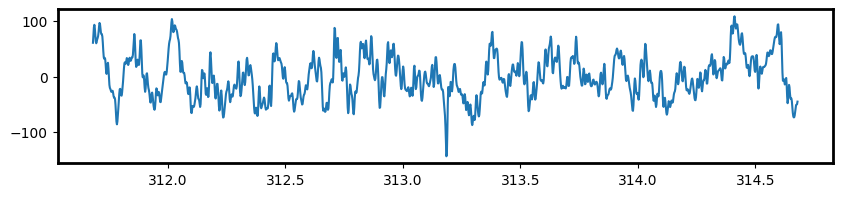

In [18]:
#Use processed data instead of eeg data
#time = processedData.index
#C1 = processedData.iloc[:,0]
time = segmented_data.index
C1 = segmented_data.iloc[:,0]
#time = ERP.index[0:1500]
#C1 = ERP.iloc[0:1500,0]

time = np.array(time)#[0:1000]
C1 = np.array(C1)#[0:1000]
print(C1.shape)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.plot(time, C1)

#TODO: Align to onset of stimulus

Text(0, 0.5, 'amplitude')

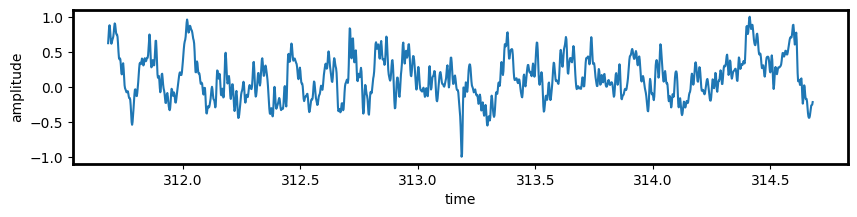

In [19]:
#Scale between -1 and 1
scalar = preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaled_data = scalar.fit_transform(C1[:,None])
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.plot(time, scaled_data)
plt.xlabel("time")
plt.ylabel("amplitude")

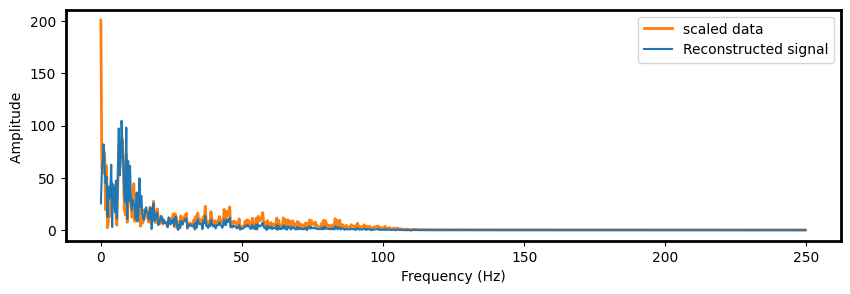

In [21]:
#(2*pi*f0*n/fs
#f0 = fs*n0/N
X = np.fft.fft(scaled_data[:,0])
Y = np.fft.fft(C1)
Z = np.fft.fft(o.SIG_[o.NEPOCHS-1])
N = len(X)
n = np.arange(int(N/2))
T = N/o.sampling_rate
freq = n/T
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)
#plt.stem(f_oneside, np.abs(X[:n_oneside]), 'b', \
#         markerfmt=" ", basefmt="-b")
plt.plot(f_oneside, np.abs(X[:n_oneside]), label="scaled data", color=colors(1), linewidth=2)
#plt.plot(f_oneside, np.abs(Y[:n_oneside]), label="Actual signal")
plt.plot(f_oneside, np.abs(Z[:n_oneside]), label="Reconstructed signal")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude ')
#plt.title("FFT")
#plt.xscale("log")
#plt.yscale("log")
#plt.ylim(1, 300)
plt.legend()

#remove 50Hz, LPF 150

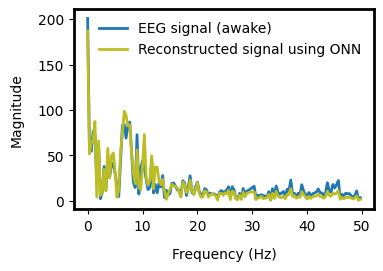

In [46]:
# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 2))

temp = f_oneside[0:150]
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('Frequency (Hz)', labelpad=10)
ax.set_ylabel('Magnitude', labelpad=10)
ax.plot(temp, np.abs(X[:150]), label="EEG signal (awake)", color=colors(0), linewidth=2)
ax.plot(temp, np.abs(Z[:150]), label="Reconstructed signal using ONN", color=colors(8), linewidth=2)
ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=10)
plt.show()

In [20]:
print("Cut-off frequency", fc)
o = ONN(N=100, NEPOCHS=1000, fc=fc)

def Run():
    o.fit(scaled_data, sampling_rate=500)
th1 = threading.Thread(target=Run).start()

Cut-off frequency 100
Preprocessing done...
End of epoch 0
End of epoch 1
End of epoch 2
End of epoch 3
End of epoch 4
End of epoch 5
End of epoch 6
End of epoch 7
End of epoch 8
End of epoch 9
End of epoch 10
End of epoch 11
End of epoch 12
End of epoch 13
End of epoch 14
End of epoch 15
End of epoch 16
End of epoch 17
End of epoch 18
End of epoch 19
End of epoch 20
End of epoch 21
End of epoch 22
End of epoch 23
End of epoch 24
End of epoch 25
End of epoch 26
End of epoch 27
End of epoch 28
End of epoch 29
End of epoch 30
End of epoch 31
End of epoch 32
End of epoch 33
End of epoch 34
End of epoch 35
End of epoch 36
End of epoch 37
End of epoch 38
End of epoch 39
End of epoch 40
End of epoch 41
End of epoch 42
End of epoch 43
End of epoch 44
End of epoch 45
End of epoch 46
End of epoch 47
End of epoch 48
End of epoch 49
End of epoch 50
End of epoch 51
End of epoch 52
End of epoch 53
End of epoch 54
End of epoch 55
End of epoch 56
End of epoch 57
End of epoch 58
End of epoch 59
End of

In [20]:
#o.OMEGA = [] #Run to stop thread
o.progress
#print(o.SIG_[o.NEPOCHS-1])

100.0

1500


Text(0.5, 1.0, 'Reconstructed signal')

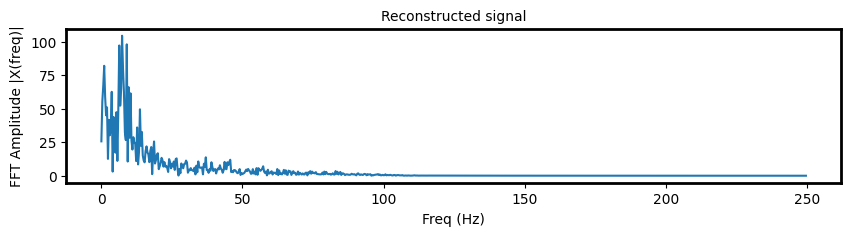

In [22]:
X = np.fft.fft(o.SIG_[o.NEPOCHS-1])
N = len(X)
print(N)
n = np.arange(int(N/2))
T = N/o.sampling_rate
freq = n/T
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
#plt.stem(f_oneside, np.abs(X[:n_oneside]), 'b', \
#         markerfmt=" ", basefmt="-b")
plt.plot(f_oneside, np.abs(X[:n_oneside]))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title("Reconstructed signal")
#plt.xscale("log")
#plt.yscale("log")
#plt.ylim(1, 300)

#remove 50Hz, LPF 150

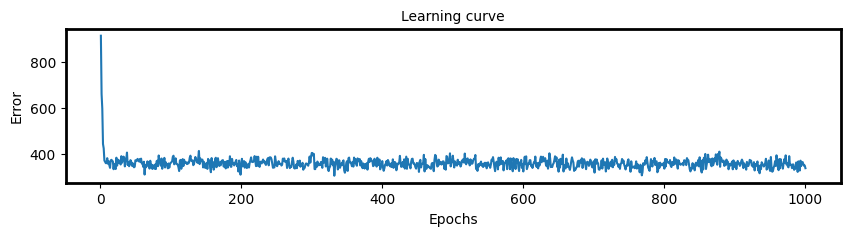

In [23]:
epochs = np.linspace(1, o.NEPOCHS, o.NEPOCHS)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.plot(epochs, o.ERR_)
plt.show()

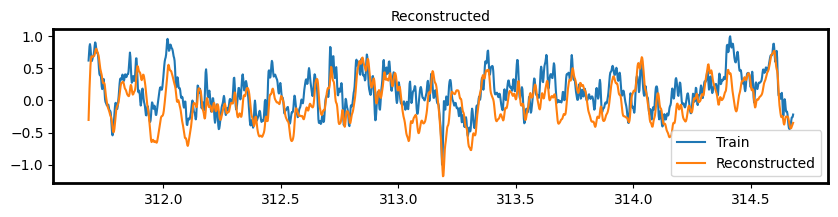

In [24]:
#TODO: Try exponenial distribution for amplitudes

# scalar = preprocessing.MinMaxScaler()
# scaled_data = scalar.fit_transform(C1[:,None])
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.title("Train")
plt.plot(time, scaled_data, label="Train")

data = o.SIG_[o.NEPOCHS-1]
plt.title("Reconstructed")
plt.plot(time, data, label="Reconstructed")
plt.legend()

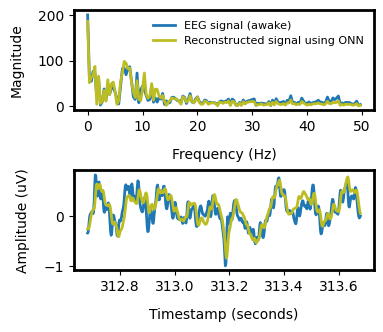

In [56]:
# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(3, 2))

ax = fig.add_axes([0, 0, 1, 0.5])
ax2 = fig.add_axes([0, 0.8, 1, 0.5])
ax2.set_xlabel('Frequency (Hz)', labelpad=10)
ax2.set_ylabel('Magnitude', labelpad=10)
ax2.plot(temp, np.abs(X[:150]), label="EEG signal (awake)", color=colors(0), linewidth=2)
ax2.plot(temp, np.abs(Z[:150]), label="Reconstructed signal using ONN", color=colors(8), linewidth=2)

ax.set_xlabel('Timestamp (seconds)', labelpad=10)
ax.set_ylabel('Amplitude (uV)', labelpad=10)
ax.plot(time[500:1000], scaled_data[500:1000], label="EEG (awake)", color=colors(0), linewidth=2)
ax.plot(time[500:1000], data[500:1000], label="Reconstructed signal using ONN", color=colors(8), linewidth=2)
ax2.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=8)
plt.show()

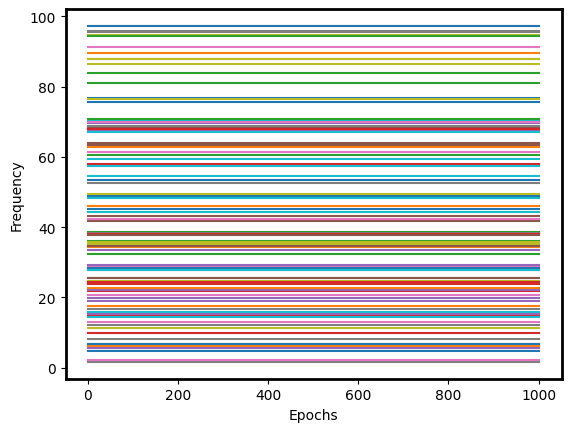

In [25]:
epochs = np.linspace(1, o.NEPOCHS+1, o.NEPOCHS+1)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Frequency")
for i in range(len(o.OMEGA_)):
    plt.plot(epochs, o.OMEGA_[i])
plt.show()

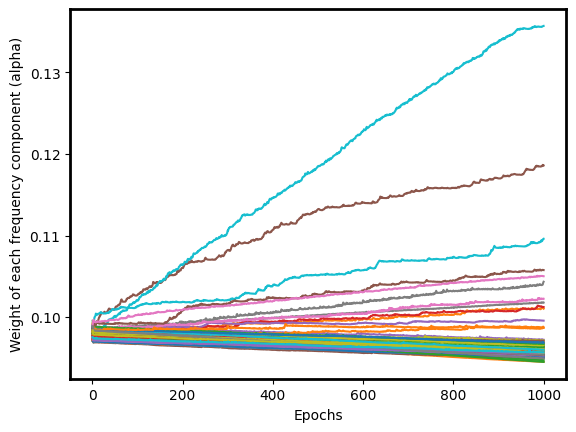

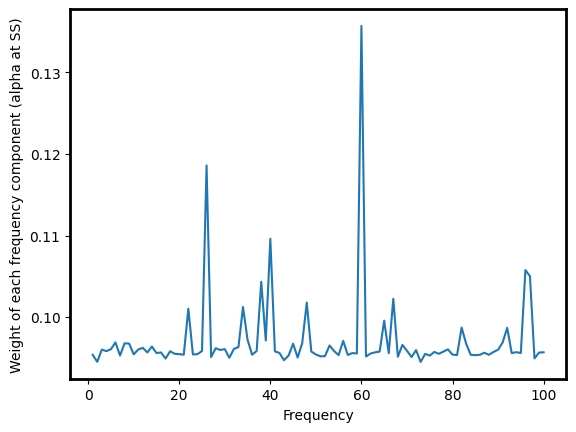

In [26]:
#Alpha can't be learnt accurately untill theta is learnt

epochs = np.linspace(1, o.NEPOCHS, o.NEPOCHS)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Weight of each frequency component (alpha)")
FINAL_VALS = []
for i in range(len(o.ALPHA_)):
    plt.plot(epochs, o.ALPHA_[i], label=str(i+1))
    FINAL_VALS.append(o.ALPHA_[i][o.NEPOCHS-1])
plt.show()

f = plt.figure()
plt.xlabel("Frequency")
plt.ylabel("Weight of each frequency component (alpha at SS)")
plt.plot(np.linspace(1, o.N, o.N), FINAL_VALS)
plt.show()

(1000,)


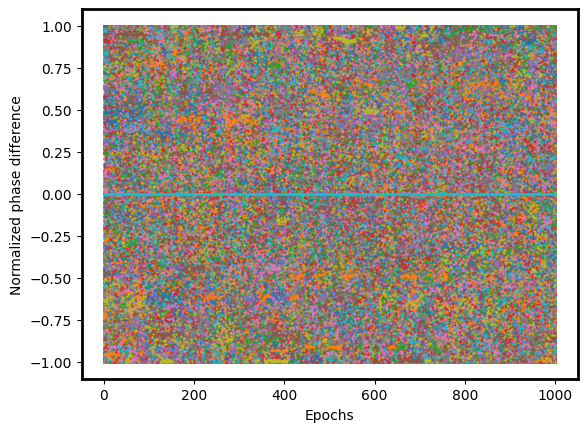

In [27]:
bin_conn = np.zeros([o.N, o.N])
bin_conn[o.A > 0] = 1

"""
Normalized phase difference should be zero at steady state
Is this way of calculating NPD correct? PHI dot can be different from OMEGA (yes most likely)
"""
print(o.NORM_PHASE_DIFF_[0,0].shape)
epochs = np.linspace(1, o.NEPOCHS, o.NEPOCHS)
f = plt.figure()
plt.xlabel("Epochs")
plt.ylabel("Normalized phase difference")
for i in range(o.N-70):
    for j in range(o.N-70):
        plt.scatter(epochs, np.sin(o.OMEGA[i]*o.NORM_PHASE_DIFF_[i][j]), s=0.4) #linewidth=1
plt.show()

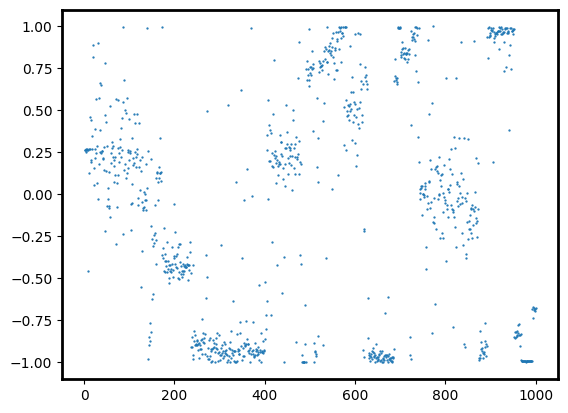

In [29]:
#43,52
i = 13
j = 20
f = plt.figure()
plt.scatter(epochs, np.sin(o.OMEGA[i]*o.NORM_PHASE_DIFF_[i][j]), s=0.4)
plt.show()

In [13]:
debug

> /home/jupyter-avinash/ranjan_env/lib/python3.9/site-packages/pandas/core/internals/construction.py(422)_check_values_indices_shape_match()
    420         passed = values.shape
    421         implied = (len(index), len(columns))
--> 422         raise ValueError(f"Shape of passed values is {passed}, indices imply {implied}")
    423 
    424 



ipdb>  data.shape


*** NameError: name 'data' is not defined


ipdb>  data


*** NameError: name 'data' is not defined


ipdb>  values.shape


(696966, 30)


ipdb>  q


In [ ]:
#
#Amplitude can change during training
#Multiple oscillator in brain region